# **Bank Loan Analysis**

#### Import Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import plotly.express as px

In [3]:
import pandas as pd

df = pd.read_csv("financial_loan.csv")
print(df.head())


        id address_state application_type emp_length              emp_title  \
0  1077430            GA       INDIVIDUAL   < 1 year                  Ryder   
1  1072053            CA       INDIVIDUAL    9 years         MKC Accounting   
2  1069243            CA       INDIVIDUAL    4 years  Chemat Technology Inc   
3  1041756            TX       INDIVIDUAL   < 1 year    barnes distribution   
4  1068350            IL       INDIVIDUAL  10+ years          J&J Steel Inc   

  grade home_ownership issue_date last_credit_pull_date last_payment_date  \
0     C           RENT  2/11/2021             9/13/2021         4/13/2021   
1     E           RENT   1/1/2021            12/14/2021         1/15/2021   
2     C           RENT   1/5/2021            12/12/2021          1/9/2021   
3     B       MORTGAGE  2/25/2021            12/12/2021         3/12/2021   
4     A       MORTGAGE   1/1/2021            12/14/2021         1/15/2021   

   ... sub_grade        term  verification_status annual_incom

In [4]:
df.tail

<bound method NDFrame.tail of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership  issue_date  \
0                                Ryder     C           RENT   2/11/2021   
1                       MKC Accounting     E           RENT    1/1/2021   
2                Chemat 

#### Metadata of the data

In [5]:
print("No of rows:",df.shape[0])
print("No of columns:",df.shape[1])


No of rows: 38576
No of columns: 24


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

#### Data Types

In [7]:
df.dtypes

id                         int64
address_state             object
application_type          object
emp_length                object
emp_title                 object
grade                     object
home_ownership            object
issue_date                object
last_credit_pull_date     object
last_payment_date         object
loan_status               object
next_payment_date         object
member_id                  int64
purpose                   object
sub_grade                 object
term                      object
verification_status       object
annual_income            float64
dti                      float64
installment              float64
int_rate                 float64
loan_amount                int64
total_acc                  int64
total_payment              int64
dtype: object

In [8]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


#### Total Loan Applications

In [9]:
total_loan_applications = df['id'].count()
print("Total Loan Applications:",total_loan_applications)

Total Loan Applications: 38576


#### MTD Total Loan Applications

In [ ]:
# Convert issue_date to datetime
df['issue_date'] = pd.to_datetime(df['issue_date'])

latest_issue_date = df["issue_date"].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_loan_applications = mtd_data['id'].count()

print(f"MTD loan applications (for {latest_issue_date.strftime('%B %Y')}): {mtd_loan_applications}")


MTD loan applications (for December 2021): 4314


#### Total Funded Amount

In [17]:
total_funded_amount = df["loan_amount"].sum()
total_funded_amt_millions = total_funded_amount/1000000
print("Total funded amount: ${:2f}M".format(total_funded_amt_millions))

Total funded amount: $435.757075M


#### MTD Total Funded Amount

In [25]:
df['issue_date'] = pd.to_datetime(df['issue_date'])

latest_issue_date = df["issue_date"].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_funded_amt = mtd_data['loan_amount'].sum()
mtd_total_funded_amt_millions = mtd_total_funded_amt/1000000

print("MTD Total funded amount: ${:2f}M".format(mtd_total_funded_amt_millions))




MTD Total funded amount: $53.981425M


#### Total Amount Recieved

In [29]:
total_amount_recieved = df['total_payment'].sum()
total_amt_recieved_millions = total_amount_recieved/1000000
print("Total amount received: ${:.2f}M".format (total_amt_recieved_millions))

Total amount received: $473.07M


#### MTD Total Amount Recieved

In [34]:
df['issue_date'] = pd.to_datetime(df['issue_date'])
latest_issue_date = df['issue_date'].max()
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df["issue_date"].dt.month == latest_month)]

mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_recieved_millions = mtd_total_amount_received/1000000

print("MTD Total amount recieved: ${:.2f}M".format(mtd_total_amount_recieved_millions))



MTD Total amount recieved: $58.07M


#### Average Interest Rate

In [36]:
avg_interest_rate = df["int_rate"].mean()*100

print("Average interest rate:{:.2f}% ".format(avg_interest_rate))

Average interest rate:12.05% 


#### Average Debt-To-Income Ratio (DTI)

In [37]:
avg_dti = df["dti"].mean()*100
print("Average DTI:{:.2f}%".format(avg_dti))

Average DTI:13.33%


In [41]:
good_loans = df[df['loan_status'].isin(["Fully Paid","Current"])]

total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amt = good_loans['loan_amount'].sum()
good_loan_recieved = good_loans['total_payment'].sum()

good_loan_funded_amt_millions = good_loan_funded_amt / 1000000
good_loan_recieved_millions = good_loan_recieved / 1000000

good_loan_percentage = (good_loan_applications / total_loan_applications)*100

print("Good loan applications: ",good_loan_applications)
print("Good Loan Funded amount (in millions):${:.2f}M".format(good_loan_funded_amt_millions))
print("Good Loan Funded amount (in millions):${:.2f}M".format(good_loan_recieved_millions))
print("Percentage of Good Loan applications: {:.2f}%".format(good_loan_percentage))

Good loan applications:  33243
Good Loan Funded amount (in millions):$370.22M
Good Loan Funded amount (in millions):$435.79M
Percentage of Good Loan applications: 86.18%


#### Bad Loan Matrics

In [43]:
bad_loans = df[df['loan_status'].isin(["Charged Off"])]

total_loan_applications = df['id'].count()

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amt = bad_loans['loan_amount'].sum()
bad_loan_recieved = bad_loans['total_payment'].sum()

bad_loan_funded_amt_millions = bad_loan_funded_amt / 1000000
bad_loan_recieved_millions = bad_loan_recieved / 1000000

bad_loan_percentage = (bad_loan_applications / total_loan_applications)*100

print("bad loan applications: ",bad_loan_applications)
print("bad Loan Funded amount (in millions):${:.2f}M".format(bad_loan_funded_amt_millions))
print("bad Loan Funded amount (in millions):${:.2f}M".format(bad_loan_recieved_millions))
print("Percentage of bad Loan applications: {:.2f}%".format(bad_loan_percentage))

bad loan applications:  5333
bad Loan Funded amount (in millions):$65.53M
bad Loan Funded amount (in millions):$37.28M
Percentage of bad Loan applications: 13.82%


#### Monthly Trends by issue Date for Total Funded amount

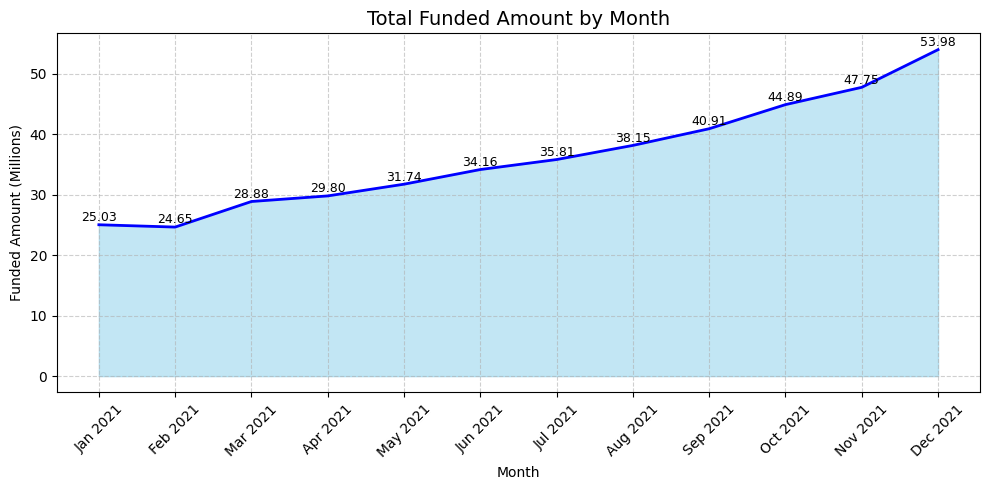

In [8]:
df['issue_date'] = pd.to_datetime(df['issue_date'])

monthly_funded = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['loan_amount']
    .sum()
    .div(1000000)
    .reset_index(name='loan_amount_millions')
)


x = range(len(monthly_funded))
y = monthly_funded['loan_amount_millions']

plt.figure(figsize=(10, 5))
plt.fill_between(x, y, color='skyblue', alpha=0.5)
plt.plot(x, y, color='blue', linewidth=2)

# Annotate values
for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions'] + 0.1, 
             f"{row['loan_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, color='black')

plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount (Millions)')
plt.xticks(ticks=x, labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Monthly Trends by Issue Date for Total amount Recieved

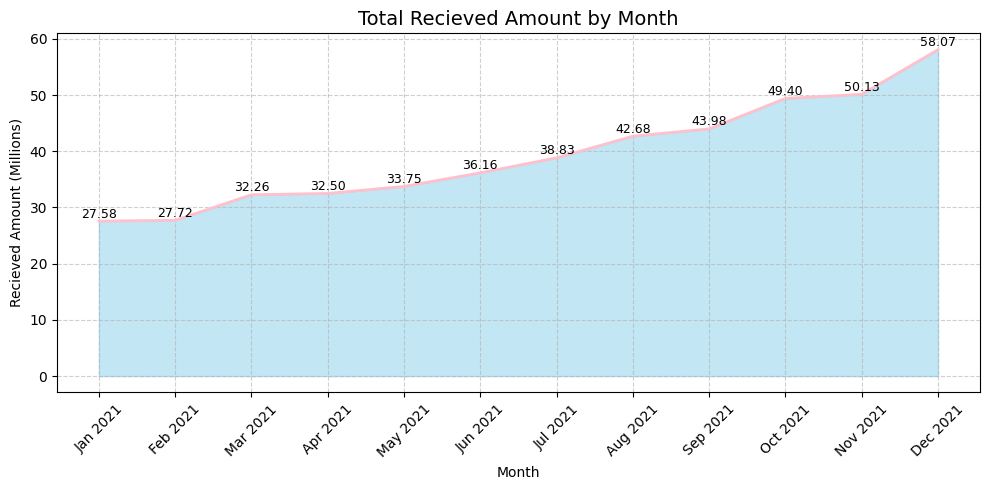

In [13]:
df['issue_date'] = pd.to_datetime(df['issue_date'])

monthly_funded = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['total_payment']
    .sum()
    .div(1000000)
    .reset_index(name='recieved_amount_millions')
)


x = range(len(monthly_funded))
y = monthly_funded['recieved_amount_millions']

plt.figure(figsize=(10, 5))
plt.fill_between(x, y, color='skyblue', alpha=0.5)
plt.plot(x, y, color='Pink', linewidth=2)

# Annotate values
for i, row in monthly_funded.iterrows():
    plt.text(i, row['recieved_amount_millions'] + 0.1, 
             f"{row['recieved_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, color='black')

plt.title('Total Recieved Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Recieved Amount (Millions)')
plt.xticks(ticks=x, labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Monthly Trends by Issue Date for Total Loan applications

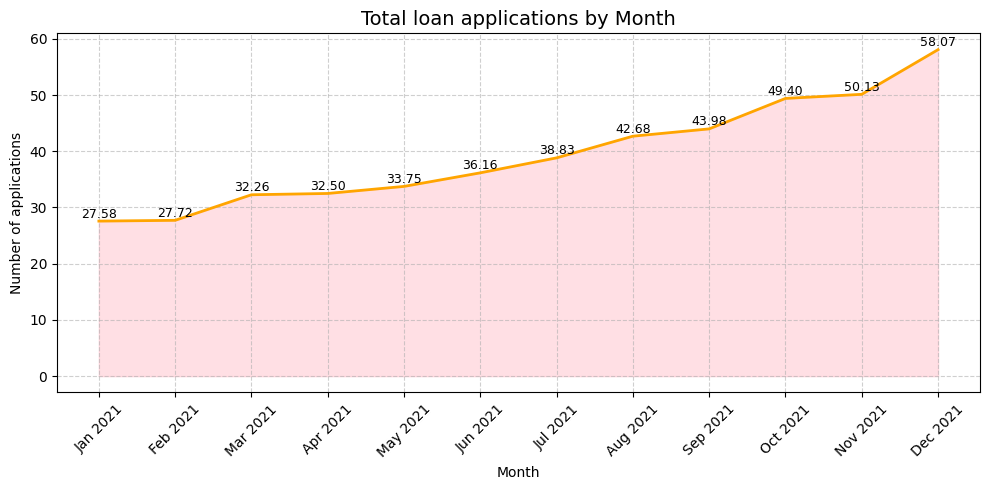

In [15]:
df['issue_date'] = pd.to_datetime(df['issue_date'])

monthly_funded = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['total_payment']
    .sum()
    .div(1000000)
    .reset_index(name='loan_applications_count')
)


x = range(len(monthly_funded))
y = monthly_funded['loan_applications_count']

plt.figure(figsize=(10, 5))
plt.fill_between(x, y, color='pink', alpha=0.5)
plt.plot(x, y, color='orange', linewidth=2)

# Annotate values
for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_applications_count'] + 0.1, 
             f"{row['loan_applications_count']:.2f}",
             ha='center', va='bottom', fontsize=9, color='black')

plt.title('Total loan applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of applications')
plt.xticks(ticks=x, labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Regional Analysis by Sate for Total Funded Amount

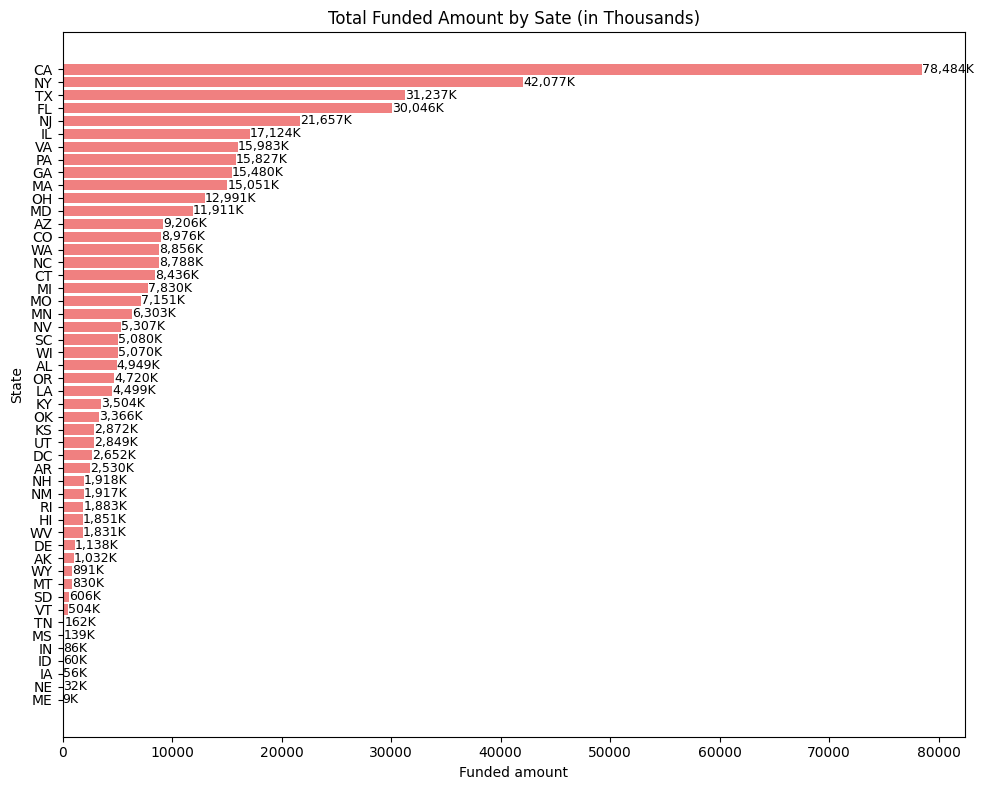

In [16]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize = (10,8))
bars = plt.barh(state_funding_thousands.index , state_funding_thousands.values,color = 'lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10 , bar.get_y() + bar.get_height() / 2,
             f'{width:,.0f}K',va = 'center',fontsize = 9)
    
plt.title('Total Funded Amount by Sate (in Thousands)')
plt.xlabel('Funded amount')
plt.ylabel('State')
plt.tight_layout()
plt.show()    

#### Regional Analysis by Sate for Total Recieved Amount

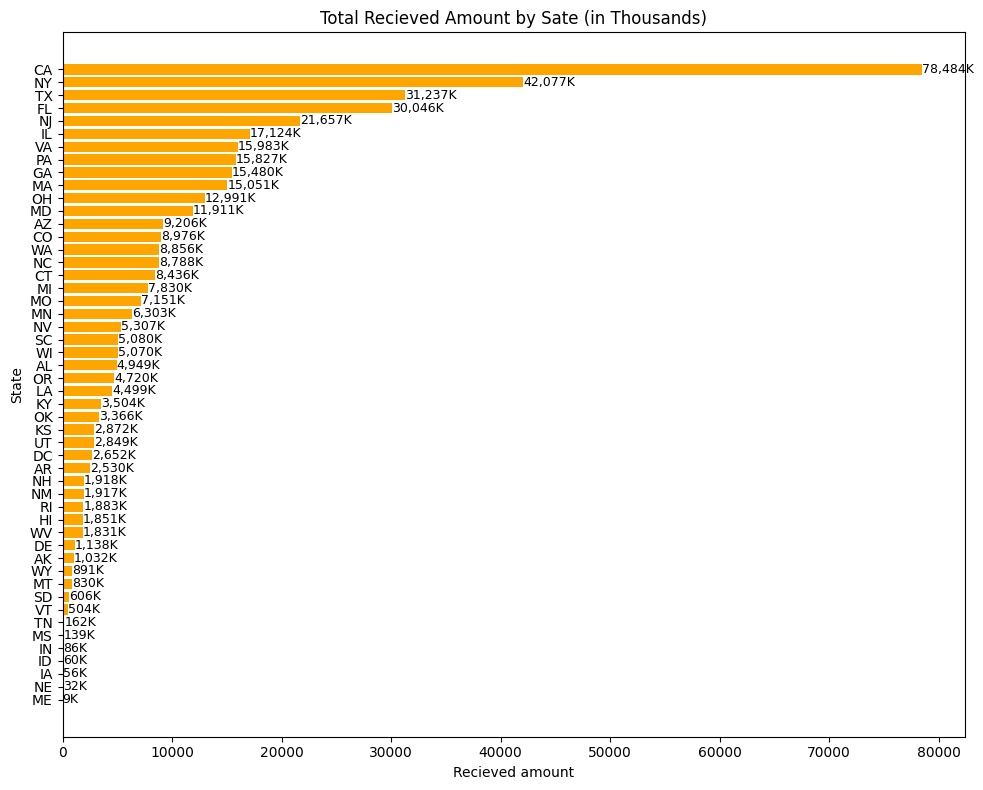

In [18]:
state_recieved = df.groupby('address_state')['total_payment'].sum().sort_values(ascending=True)
state_recieved_thousands = state_funding / 1000

plt.figure(figsize = (10,8))
bars = plt.barh(state_funding_thousands.index , state_funding_thousands.values,color = 'Orange')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10 , bar.get_y() + bar.get_height() / 2,
             f'{width:,.0f}K',va = 'center',fontsize = 9)
    
plt.title('Total Recieved Amount by Sate (in Thousands)')
plt.xlabel('Recieved amount')
plt.ylabel('State')
plt.tight_layout()
plt.show()    

#### Loan Term Analysis by Total Funded amount

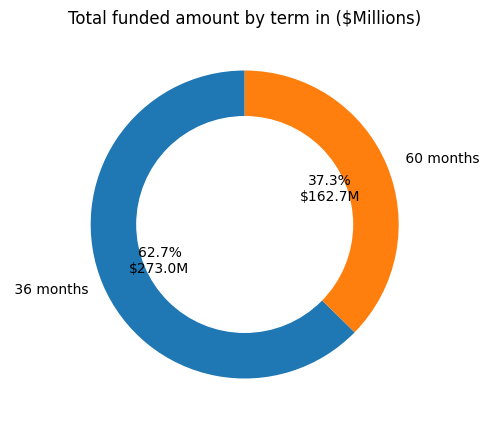

In [20]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1000000

plt.figure(figsize = (5,5))
plt.pie(
    term_funding_millions,
    labels = term_funding_millions.index,
    autopct = lambda p:f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
    startangle = 90,
    wedgeprops = {'width': 0.4}
    
)
plt.gca().add_artist(plt.Circle((0,0),0.70,color = 'white'))
plt.title("Total funded amount by term in ($Millions)")
plt.show()